In [ ]:
!nvidia-smi

Wed May 26 06:32:45 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0    23W / 300W |      0MiB / 16160MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report
import tensorflow
from tensorflow.keras.preprocessing.image import load_img, img_to_array,array_to_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.optimizers import RMSprop
from google.colab import drive

In [ ]:
!pip install tensorflow-gpu
!pip install graphviz

     |████████████████████████████████| 454.3MB 33kB/s 


In [ ]:
#Using Google Drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
##Using Google Drive
from pathlib import Path
train_path=Path('/content/gdrive/MyDrive/COVID-New/Train')
test_path=Path('/content/gdrive/MyDrive/COVID-New/Test')
print(train_path)

/content/gdrive/MyDrive/COVID-New/Train


In [ ]:
#Collecting paths of datasets
train_img_path=train_path.glob('*/*')
test_img_path=test_path.glob('*/*')
#Convert Generator Objects to List of Elements
train_img_path=list(train_img_path)
test_img_path=list(test_img_path)
print(train_img_path[0:])


[PosixPath('/content/gdrive/MyDrive/COVID-New/Train/COVID19/COVID-19 (14).jpeg'), PosixPath('/content/gdrive/MyDrive/COVID-New/Train/COVID19/COVID-19 (187).jpg'), PosixPath('/content/gdrive/MyDrive/COVID-New/Train/COVID19/COVID-19 (16).jpg'), PosixPath('/content/gdrive/MyDrive/COVID-New/Train/COVID19/COVID-19 (159).jpg'), PosixPath('/content/gdrive/MyDrive/COVID-New/Train/COVID19/COVID-19 (173).jpg'), PosixPath('/content/gdrive/MyDrive/COVID-New/Train/COVID19/COVID-19 (19).jpeg'), PosixPath('/content/gdrive/MyDrive/COVID-New/Train/COVID19/COVID-19 (12).jpeg'), PosixPath('/content/gdrive/MyDrive/COVID-New/Train/COVID19/COVID-19 (11).jpeg'), PosixPath('/content/gdrive/MyDrive/COVID-New/Train/COVID19/COVID-19 (26).jpeg'), PosixPath('/content/gdrive/MyDrive/COVID-New/Train/COVID19/COVID-19 (156).jpg'), PosixPath('/content/gdrive/MyDrive/COVID-New/Train/COVID19/COVID-19 (168).jpg'), PosixPath('/content/gdrive/MyDrive/COVID-New/Train/COVID19/COVID-19 (23).jpeg'), PosixPath('/content/gdrive/M

In [ ]:
#Convert Posixpath to List of strings
train_img_path = list(map(lambda x : str(x) , train_img_path))
test_img_path = list(map(lambda x : str(x) , test_img_path)) 
print("Train Image Length: {}".format(len(train_img_path)))
print("Test Image Length: {}".format(len(test_img_path)))

Train Image Length: 1811
Test Image Length: 484


In [ ]:
#Counting Train and Test COVID and Normal Image 
def count_img(img):
  covid=0
  normal=0
  for i in list(img):
    if(i.split('/')[-2]=='COVID19'):
      covid+=1
    else:
      normal+=1
  return normal,covid
len_train_normal,len_train_covid=count_img(train_img_path)
len_test_normal,len_test_covid=count_img(test_img_path)
print('Train Normal: {}'.format(len_train_normal))
print('Train COVID: {}'.format(len_train_covid))
print('Test Normal: {}'.format(len_test_normal))
print('Test COVID: {}'.format(len_test_covid))


Train Normal: 1266
Train COVID: 545
Test Normal: 317
Test COVID: 167


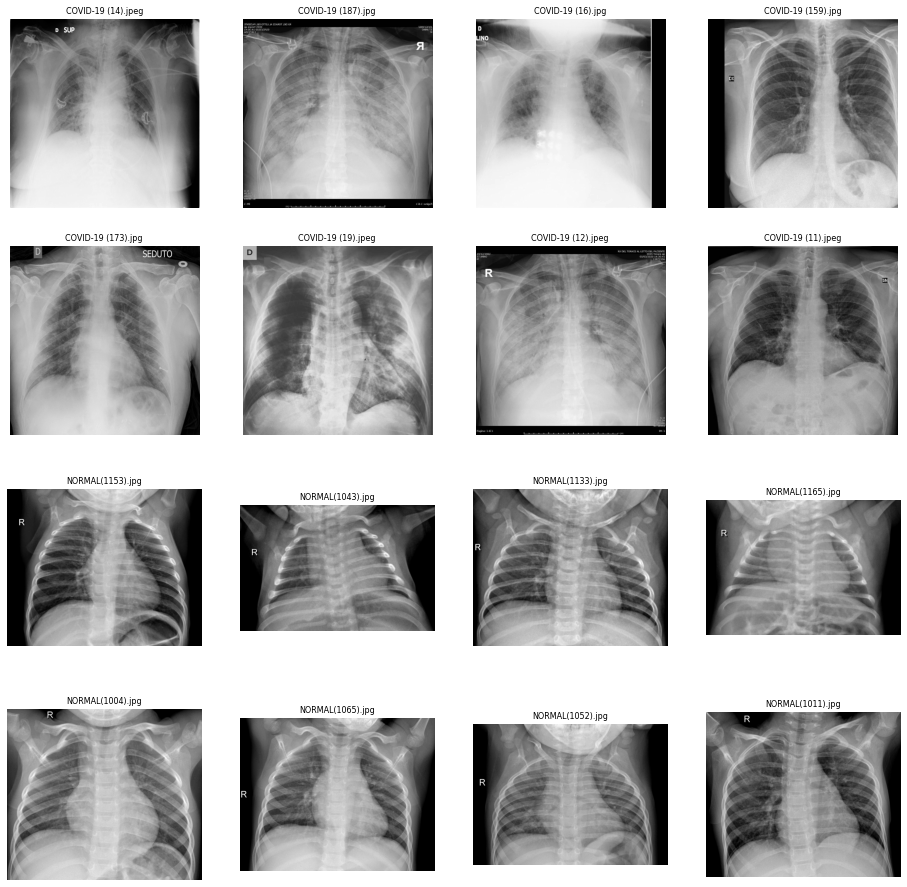

In [ ]:
##Image Visualization
L_grid = 4
W_grid = 4

#set the figure size
fig = plt.gcf()
fig.set_size_inches(16,16)

covid_grid = [img for img in list(train_img_path)[0:8]]
normal_grid = [img for img in list(test_img_path)[0:8]]
for i , img_path in enumerate(covid_grid+normal_grid):
  img_nam=img_path.split('/')[-1]
  axes =plt.subplot(L_grid,W_grid,i+1)
  axes.axis('Off')
  img = mpimg.imread(img_path)
  axes.set_title(img_nam,fontsize=8)
  plt.imshow(img,cmap='gray')
plt.show()


# Simple CNN Implementation

In [ ]:
#Convert Image to Array
target_image_size=(150,150)
train_imgs_files=[img for img in list(train_img_path)]
test_imgs_files=[img for img in list(test_img_path)]
train_imgs = [img_to_array(load_img(img_path, target_size=target_image_size)) for img_path in train_imgs_files]
test_imgs = [img_to_array(load_img(img_path, target_size=target_image_size)) for img_path in test_imgs_files]
train_imgs=np.array(train_imgs)
test_imgs=np.array(test_imgs)
print(train_imgs.shape)
print(test_imgs.shape)


(1811, 150, 150, 3)
(484, 150, 150, 3)


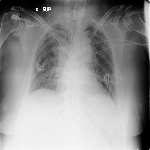

In [ ]:
#Conversion of Array to Image
array_to_img(train_imgs[0])

In [ ]:
##Labels for Train and Test Sets
train_imgs_labels = [label.split('/')[6] for label in train_imgs_files]
test_imgs_labels = [label.split('/')[6] for label in test_imgs_files]
print(len(train_imgs_labels))
print(train_imgs_labels)

1811
['COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COV

In [ ]:
#Normalization of Train and Test Data
train_imgs_scaled=train_imgs.astype('float32')
test_imgs_scaled=test_imgs.astype('float32')
train_imgs_scaled /=255
test_imgs_scaled /=255
print(train_imgs_scaled.shape)



(1811, 150, 150, 3)


In [ ]:
#Conversion of labels into Numerical values
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
train_labels_enc=encoder.fit_transform(train_imgs_labels)
test_labels_enc=encoder.transform(test_imgs_labels)
#print(test_labels_enc)

In [ ]:
#Some Initialization for Model
input_shape=(train_imgs_scaled.shape[1:])
epochs=30
batch_size=32
num_class=1
print(input_shape)

(150, 150, 3)


In [ ]:
##CNN Implementation
def create_model_init(input_shape,num_class):
    model=Sequential()
    model.add(Conv2D(32,kernel_size=(3,3),
                     padding='SAME',
                     activation='relu',
                    input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(64,kernel_size=(3,3),
                     padding='SAME',
                     activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(128,kernel_size=(3,3),
                     padding='SAME',
                     activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(256,activation='relu'))
    model.add(Dense(num_class,activation='sigmoid'))
    model.summary
    return model
model_init=create_model_init(input_shape,num_class)
model_init.compile(optimizer=RMSprop(learning_rate=0.001),
             loss='binary_crossentropy',
             metrics=['accuracy'])
history_init=model_init.fit(x=train_imgs_scaled,y=train_labels_enc,
                 validation_split=0.15,
                 batch_size=batch_size,
                 epochs=epochs,
                 verbose=1)

Epoch 1/30
49/49 [==============================] - 18s 23ms/step - loss: 0.9660 - accuracy: 0.8369 - val_loss: 0.0888 - val_accuracy: 0.9632
Epoch 2/30
49/49 [==============================] - 1s 16ms/step - loss: 0.1075 - accuracy: 0.9630 - val_loss: 0.6310 - val_accuracy: 0.8309
Epoch 3/30
49/49 [==============================] - 1s 16ms/step - loss: 0.3639 - accuracy: 0.9519 - val_loss: 0.0725 - val_accuracy: 0.9816
Epoch 4/30
49/49 [==============================] - 1s 16ms/step - loss: 0.0705 - accuracy: 0.9799 - val_loss: 0.0486 - val_accuracy: 0.9853
Epoch 5/30
49/49 [==============================] - 1s 16ms/step - loss: 0.0927 - accuracy: 0.9714 - val_loss: 0.4989 - val_accuracy: 0.8824
Epoch 6/30
49/49 [==============================] - 1s 16ms/step - loss: 0.0389 - accuracy: 0.9864 - val_loss: 0.2557 - val_accuracy: 0.9338
Epoch 7/30
49/49 [==============================] - 1s 16ms/step - loss: 0.1688 - accuracy: 0.9844 - val_loss: 0.1291 - val_accuracy: 0.9706
Epoch 8/30
4

True

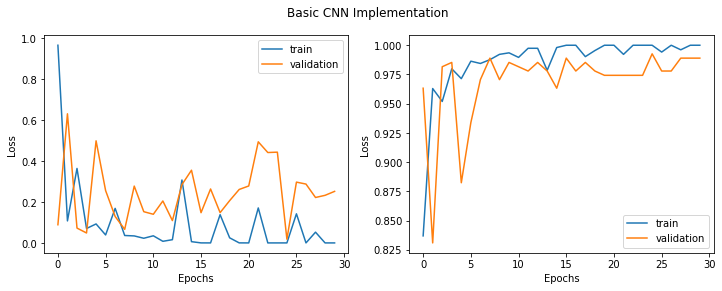

In [ ]:
#Plot Training Loss vs Validation Loss
def plot_history(history_model,title_name):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    t = f.suptitle('{}'.format(title_name))
    ax1.plot(history_model.history['loss'],label='train')
    ax1.plot(history_model.history['val_loss'],label='validation')
    ax1.legend()
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax2.plot(history_model.history['accuracy'],label='train')
    ax2.plot(history_model.history['val_accuracy'],label='validation')
    ax2.legend()
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    return True
plot_history(history_init,'Basic CNN Implementation')

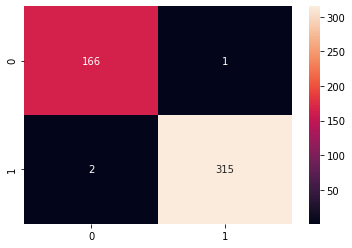

In [ ]:
##Model Evaulation
y_hat=(model_init.predict(test_imgs_scaled) > 0.5).astype("int32")
#y_hat=np.argmax(model_init.predict(test_imgs_scaled), axis=-1) #multi-class and if softmax at last-layer activation
cm=confusion_matrix(test_labels_enc,y_hat)
sns.heatmap(cm, annot=True, fmt="d")

In [ ]:
#Model Evaluation
from sklearn.metrics import classification_report
print(classification_report(test_labels_enc,y_hat))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       167
           1       1.00      0.99      1.00       317

    accuracy                           0.99       484
   macro avg       0.99      0.99      0.99       484
weighted avg       0.99      0.99      0.99       484



# CNN Model with Regularization

In [ ]:
def create_model_reg():
    model=Sequential()
    model.add(Conv2D(32,kernel_size=(3,3),padding='SAME',activation='relu',
                    input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(64,kernel_size=(3,3),padding='SAME',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(128,kernel_size=(3,3),padding='SAME',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(256,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(256,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(1,activation='sigmoid'))
    model.summary()
    return model
model_cnn_reg=create_model_reg()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 37, 37, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 18, 18, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 41472)            

In [ ]:
model_cnn_reg.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])
history_cnn_reg=model_cnn_reg.fit(x=train_imgs_scaled,y=train_labels_enc,
                 validation_split=0.15,
                 batch_size=batch_size,
                 epochs=epochs,
                 verbose=1)

Epoch 1/30
49/49 [==============================] - 2s 20ms/step - loss: 0.5553 - accuracy: 0.8460 - val_loss: 1.0615 - val_accuracy: 0.6801
Epoch 2/30
49/49 [==============================] - 1s 16ms/step - loss: 0.1651 - accuracy: 0.9448 - val_loss: 0.1181 - val_accuracy: 0.9669
Epoch 3/30
49/49 [==============================] - 1s 17ms/step - loss: 0.1214 - accuracy: 0.9682 - val_loss: 0.1138 - val_accuracy: 0.9779
Epoch 4/30
49/49 [==============================] - 1s 16ms/step - loss: 0.1555 - accuracy: 0.9597 - val_loss: 0.0691 - val_accuracy: 0.9816
Epoch 5/30
49/49 [==============================] - 1s 16ms/step - loss: 0.0991 - accuracy: 0.9708 - val_loss: 0.1085 - val_accuracy: 0.9706
Epoch 6/30
49/49 [==============================] - 1s 16ms/step - loss: 0.0397 - accuracy: 0.9844 - val_loss: 0.1746 - val_accuracy: 0.9449
Epoch 7/30
49/49 [==============================] - 1s 17ms/step - loss: 0.0639 - accuracy: 0.9792 - val_loss: 0.0822 - val_accuracy: 0.9853
Epoch 8/30
49

True

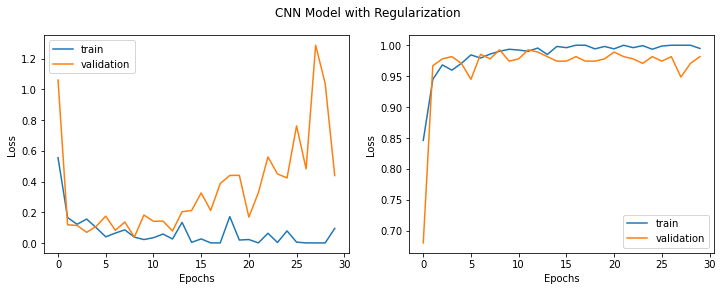

In [ ]:
plot_history(history_cnn_reg,'CNN Model with Regularization')

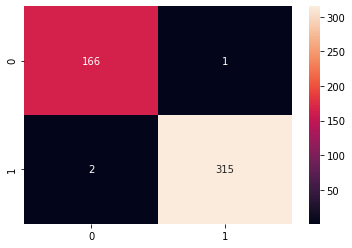

In [ ]:
##Model Evaulation
y_hat_reg=(model_init.predict(test_imgs_scaled) > 0.5).astype("int32")
cm=confusion_matrix(test_labels_enc,y_hat_reg)
sns.heatmap(cm, annot=True, fmt="d")

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_labels_enc,y_hat_reg))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       167
           1       1.00      0.99      1.00       317

    accuracy                           0.99       484
   macro avg       0.99      0.99      0.99       484
weighted avg       0.99      0.99      0.99       484



# CNN Model with Image Augmentation


In [ ]:
##Image Data Augementation: Import All the Images in the directory
##Generator for train and validation data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
target_image_size=(150,150)
train_datagen=ImageDataGenerator(rescale=1./255,
                                 validation_split=0.15,
                                 zoom_range=0.2,
                                 shear_range=0.2,
                                 rotation_range=15,
                                 width_shift_range=0.2,
                                 height_shift_range=0.2,
                                 fill_mode='nearest',
                                 horizontal_flip=True)
val_datagen=ImageDataGenerator(rescale=1./255)
tst_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
train_data=train_datagen.flow_from_directory(train_path,
                                             target_size=target_image_size,
                                             subset='training',
                                             batch_size=batch_size,
                                             class_mode='binary')
val_data=train_datagen.flow_from_directory(train_path,
                                           target_size=target_image_size,
                                           subset='validation',
                                           batch_size=batch_size,
                                           class_mode='binary')
test_data=tst_datagen.flow_from_directory(test_path,
                                          target_size=target_image_size,
                                          batch_size=batch_size,
                                          class_mode='binary')

Found 1541 images belonging to 2 classes.
Found 270 images belonging to 2 classes.
Found 484 images belonging to 2 classes.


In [ ]:
len_traindata=train_data.samples
print(len_traindata)

1541


In [ ]:
len(train_data)

49

In [ ]:
print(train_data.index_generator)

<generator object Iterator._flow_index at 0x7f7ef450a950>


In [ ]:
print('Image Shape: {}'.format(train_data.image_shape))
print('Label: {}'.format(train_data.class_indices))
input_shape=train_data.image_shape

Image Shape: (150, 150, 3)
Label: {'COVID19': 0, 'NORMAL': 1}


In [ ]:
def create_model_aug2():
    model=Sequential()
    model.add(Conv2D(32,kernel_size=(3,3),padding='SAME',activation='relu',
                    input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(64,kernel_size=(3,3),padding='SAME',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(128,kernel_size=(3,3),padding='SAME',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(256,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(256,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(1,activation='sigmoid'))
    model.summary()
    return model
model_cnn_aug2=create_model_aug2()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 37, 37, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 18, 18, 128)       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 41472)            

In [ ]:
model_cnn_aug2.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])
history_cnn_aug2=model_cnn_aug2.fit(train_data,
                                  validation_data=val_data,
                                  steps_per_epoch=len_traindata//batch_size,
                                  epochs=epochs,
                                  verbose=1)

Epoch 1/30
48/48 [==============================] - 53s 1s/step - loss: 0.5956 - accuracy: 0.7800 - val_loss: 0.3840 - val_accuracy: 0.8370
Epoch 2/30
48/48 [==============================] - 51s 1s/step - loss: 0.3468 - accuracy: 0.8694 - val_loss: 0.2991 - val_accuracy: 0.8963
Epoch 3/30
48/48 [==============================] - 50s 1s/step - loss: 0.2520 - accuracy: 0.9211 - val_loss: 0.2478 - val_accuracy: 0.8889
Epoch 4/30
48/48 [==============================] - 50s 1s/step - loss: 0.2682 - accuracy: 0.9039 - val_loss: 0.2347 - val_accuracy: 0.9074
Epoch 5/30
48/48 [==============================] - 50s 1s/step - loss: 0.2130 - accuracy: 0.9271 - val_loss: 0.1972 - val_accuracy: 0.9259
Epoch 6/30
48/48 [==============================] - 50s 1s/step - loss: 0.2166 - accuracy: 0.9317 - val_loss: 0.2284 - val_accuracy: 0.9185
Epoch 7/30
48/48 [==============================] - 50s 1s/step - loss: 0.2323 - accuracy: 0.9337 - val_loss: 0.1621 - val_accuracy: 0.9444
Epoch 8/30
48/48 [==

True

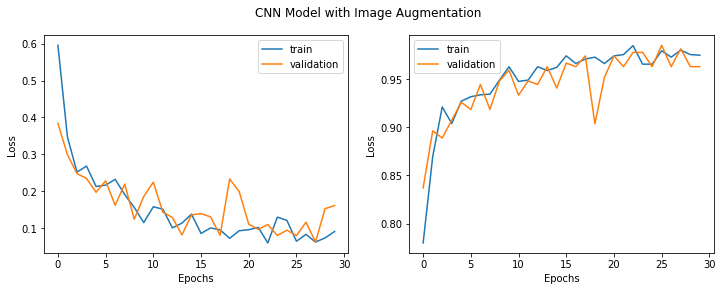

In [ ]:
plot_history(history_cnn_aug2,'CNN Model with Image Augmentation')

In [ ]:
##Model Evaluation
tst_loss,tst_acc=model_cnn_aug2.evaluate(test_data)
print('CNN Model with Image Agumentation Loss: {}, Test Accuracy: {}'.format(tst_loss,tst_acc))

16/16 [==============================] - 11s 714ms/step - loss: 0.0922 - accuracy: 0.9835
CNN Model with Image Agumentation Loss: 0.09224964678287506, Test Accuracy: 0.9834710955619812


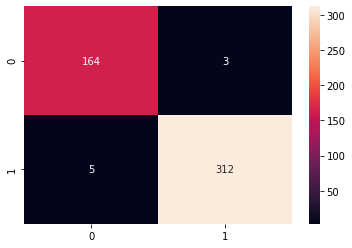

In [ ]:
##Model Evaulation
from sklearn.metrics import confusion_matrix
y_hat_aug2=(model_cnn_aug2.predict(test_imgs_scaled) > 0.5).astype("int32")
cm=confusion_matrix(test_labels_enc,y_hat_aug2)
sns.heatmap(cm, annot=True, fmt="d")

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_labels_enc,y_hat_aug2))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       167
           1       0.99      0.98      0.99       317

    accuracy                           0.98       484
   macro avg       0.98      0.98      0.98       484
weighted avg       0.98      0.98      0.98       484



# VGG-16 Model Implementation

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Flatten
#from tensorflow.keras.backend import K

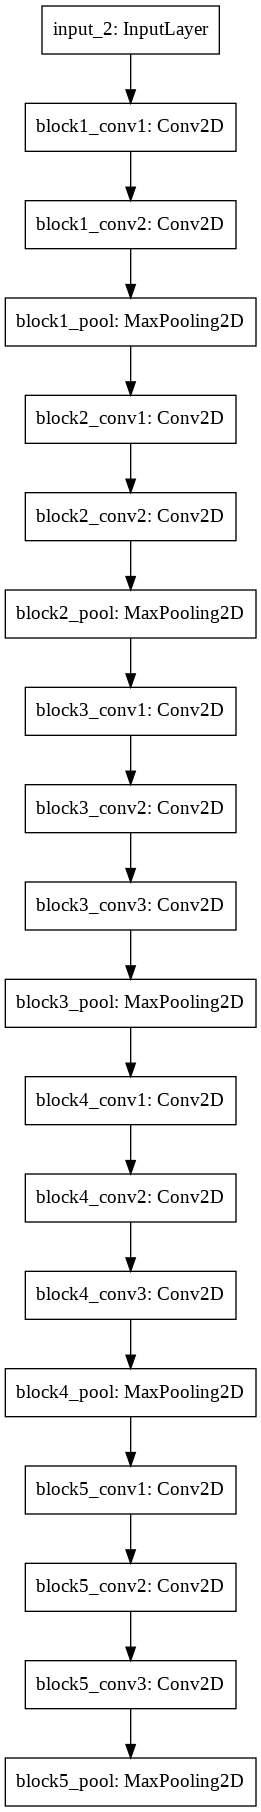

In [ ]:
vgg=VGG16(include_top=False,weights='imagenet',
         input_shape=input_shape)
plot_model(vgg,to_file='model.png')

In [ ]:
##Avoid training existing weights, otherwise existing weights will be overwrite
for layer in vgg.layers:
  layer.trainable=False

In [ ]:
x=Flatten()(vgg.output)
prediction_vgg=Dense(1,activation='sigmoid')(x)

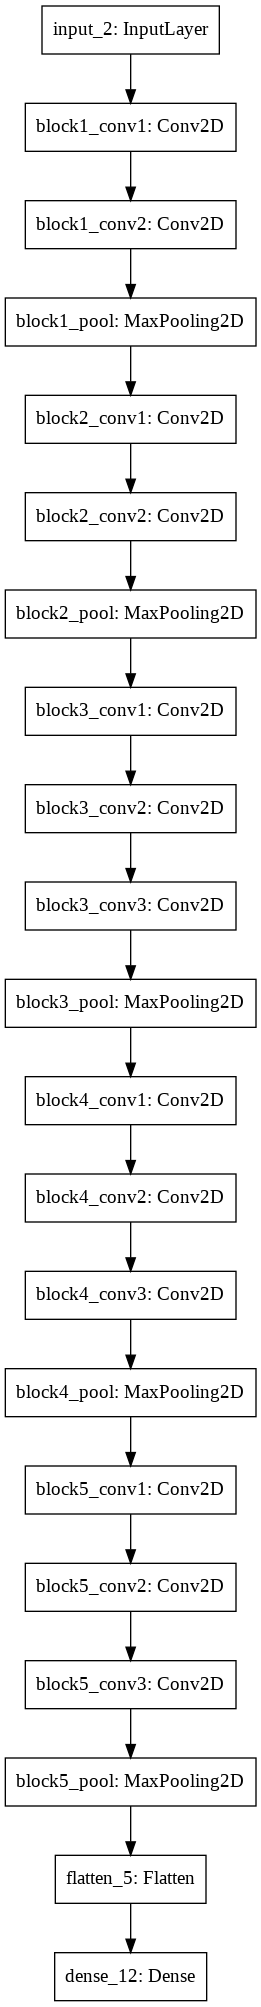

In [ ]:
##Create Inception Model
from tensorflow.keras.models import Model
vgg_model=Model(inputs=vgg.input,outputs=prediction_vgg)
plot_model(vgg_model)

In [ ]:
#vgg_model.trainable=False ##VGG-16 Freeze
vgg_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0   

In [ ]:
vgg_model.compile(optimizer=RMSprop(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
vgg_history=vgg_model.fit(train_data,
                          validation_data=val_data,
                          batch_size=batch_size,
                          steps_per_epoch=train_data.samples//batch_size,
                          #validation_steps=val_data.samples//batch_size,
                          epochs=epochs,
                          verbose=1)
#model_vgg.save('model_vgg.h5')

Epoch 1/30
48/48 [==============================] - 52s 1s/step - loss: 0.2581 - accuracy: 0.9139 - val_loss: 0.1828 - val_accuracy: 0.9259
Epoch 2/30
48/48 [==============================] - 51s 1s/step - loss: 0.1074 - accuracy: 0.9642 - val_loss: 0.1410 - val_accuracy: 0.9519
Epoch 3/30
48/48 [==============================] - 51s 1s/step - loss: 0.0871 - accuracy: 0.9702 - val_loss: 0.1627 - val_accuracy: 0.9333
Epoch 4/30
48/48 [==============================] - 51s 1s/step - loss: 0.0755 - accuracy: 0.9722 - val_loss: 0.1182 - val_accuracy: 0.9519
Epoch 5/30
48/48 [==============================] - 50s 1s/step - loss: 0.0642 - accuracy: 0.9748 - val_loss: 0.0838 - val_accuracy: 0.9593
Epoch 6/30
48/48 [==============================] - 50s 1s/step - loss: 0.0524 - accuracy: 0.9841 - val_loss: 0.0717 - val_accuracy: 0.9630
Epoch 7/30
48/48 [==============================] - 49s 1s/step - loss: 0.0461 - accuracy: 0.9861 - val_loss: 0.0784 - val_accuracy: 0.9630
Epoch 8/30
48/48 [==

True

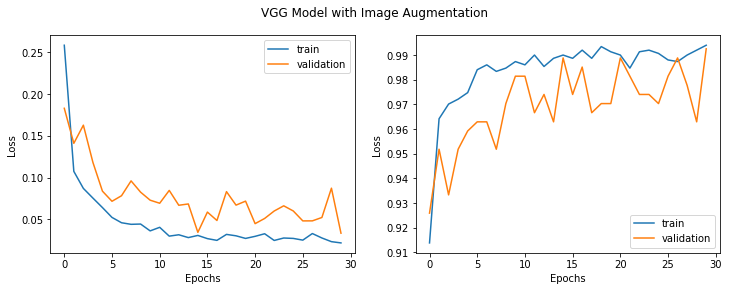

In [ ]:
plot_history(vgg_history,'VGG Model with Image Augmentation')

In [ ]:
import pandas as pd
layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])  

Layer Type  ... Layer Trainable
0   <tensorflow.python.keras.engine.input_layer.In...  ...           False
1   <tensorflow.python.keras.layers.convolutional....  ...           False
2   <tensorflow.python.keras.layers.convolutional....  ...           False
3   <tensorflow.python.keras.layers.pooling.MaxPoo...  ...           False
4   <tensorflow.python.keras.layers.convolutional....  ...           False
5   <tensorflow.python.keras.layers.convolutional....  ...           False
6   <tensorflow.python.keras.layers.pooling.MaxPoo...  ...           False
7   <tensorflow.python.keras.layers.convolutional....  ...           False
8   <tensorflow.python.keras.layers.convolutional....  ...           False
9   <tensorflow.python.keras.layers.convolutional....  ...           False
10  <tensorflow.python.keras.layers.pooling.MaxPoo...  ...           False
11  <tensorflow.python.keras.layers.convolutional....  ...           False
12  <tensorflow.python.keras.layers.convolutional....  ...           False
13  <tensorflow.python.keras.layers.convolutional....  ...           False
14  <tensorflow.python.keras.layers.pooling.MaxPoo...  ...           False
15  <tensorflow.python.keras.layers.convolutional....  ...           False
16  <tensorflow.python.keras.layers.convolutional....  ...           False
17  <tensorflow.python.keras.layers.convolutional....  ...           False
18  <tensorflow.python.keras.layers.pooling.MaxPoo...  ...           False
19  <tensorflow.python.keras.layers.core.Flatten o...  ...            True
20  <tensorflow.python.keras.layers.core.Dense obj...  ...            True

[21 rows x 3 columns]

In [ ]:
##Model Evaluation
tst_loss,tst_acc=vgg_model.evaluate(test_data)
print('VGG16 Model Test Loss: {}, Test Accuracy: {}'.format(tst_loss,tst_acc))

16/16 [==============================] - 11s 678ms/step - loss: 0.0220 - accuracy: 0.9938
VGG16 Model Test Loss: 0.022044019773602486, Test Accuracy: 0.9938016533851624


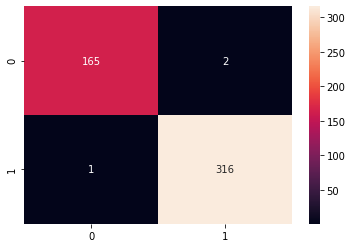

In [ ]:
##Model Evaulation
y_hat_vgg=(vgg_model.predict(test_imgs_scaled) > 0.5).astype("int32")
cm=confusion_matrix(test_labels_enc,y_hat_vgg)
sns.heatmap(cm, annot=True, fmt="d")

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_labels_enc,y_hat_vgg))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       167
           1       0.99      1.00      1.00       317

    accuracy                           0.99       484
   macro avg       0.99      0.99      0.99       484
weighted avg       0.99      0.99      0.99       484



# InceptionV3 Model Implementation

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Flatten

87916544/87910968 [==============================] - 1s 0us/step


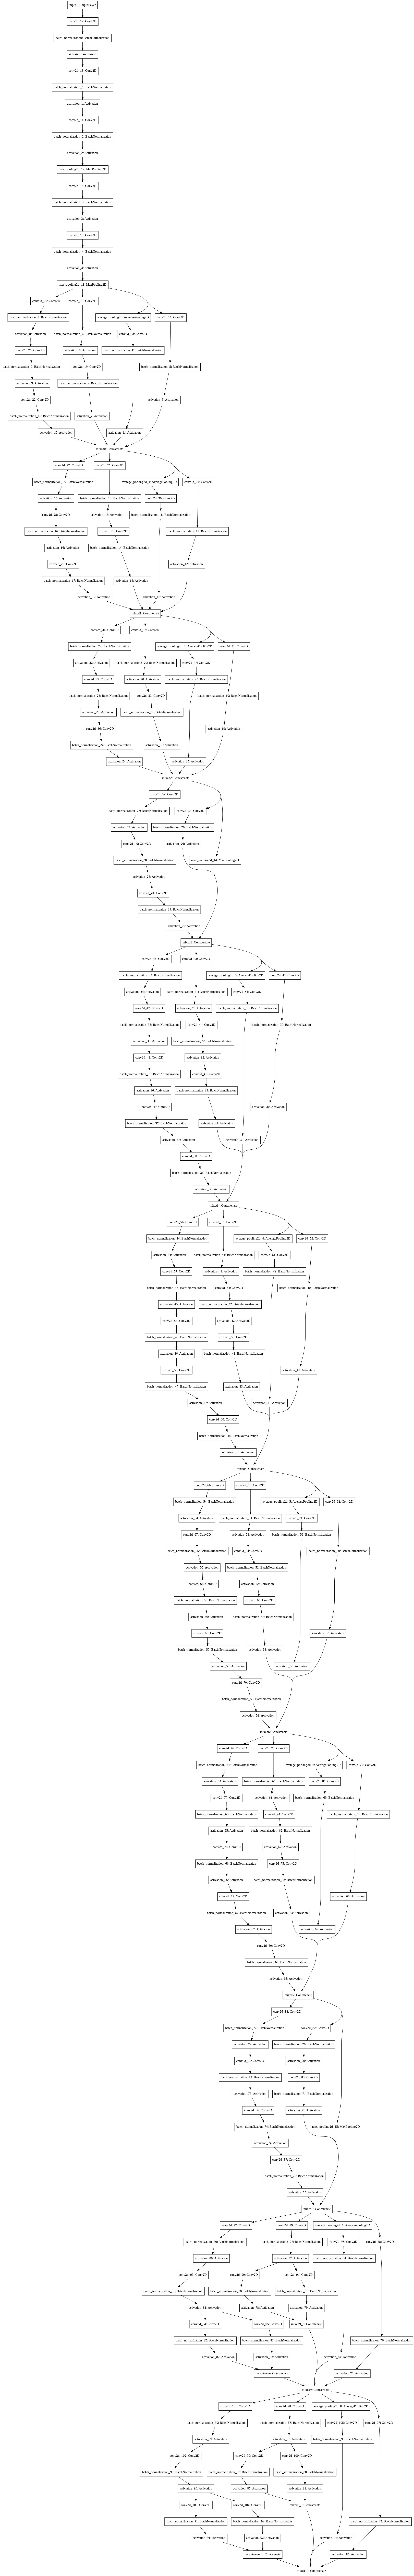

In [ ]:
inception=InceptionV3(include_top=False,weights='imagenet',
         input_shape=input_shape)
plot_model(inception,to_file='model.png')

In [ ]:
##Avoid training existing weights, otherwise existing weights will be overwrite
for layer in inception.layers:
  layer.trainable=False

In [ ]:
x=Flatten()(inception.output)
prediction_inception=Dense(1,activation='sigmoid')(x)

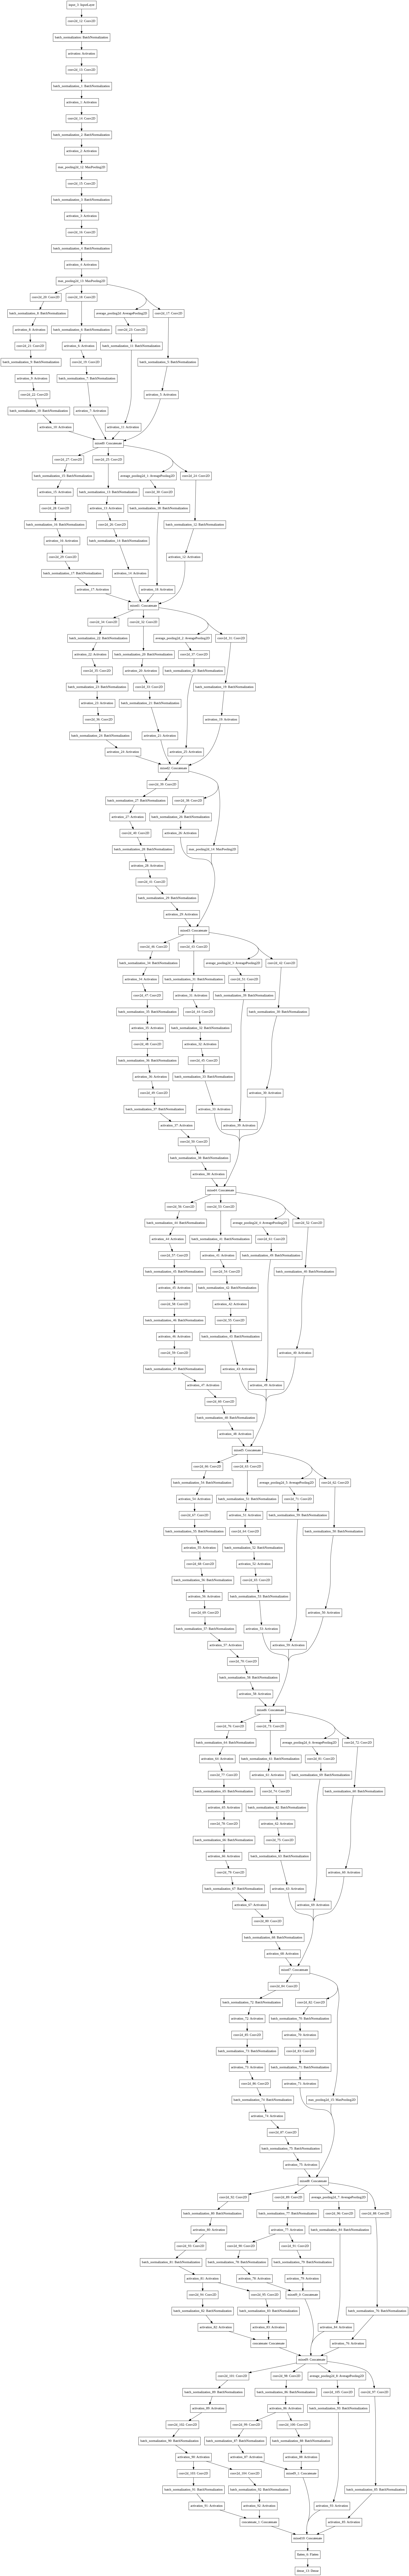

In [ ]:
##Create Inception Model
from tensorflow.keras.models import Model
inception_model=Model(inputs=inception.input,outputs=prediction_inception)
plot_model(inception_model)

In [ ]:
#inception_model.trainable=False ##InceptionV3 Freeze
inception_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_12 (Conv2D)              (None, 74, 74, 32)   864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d_12[0][0]                  
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
____________________________________________________________________________________________

In [ ]:
inception_model.compile(optimizer=RMSprop(learning_rate=0.0001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
inception_history=inception_model.fit(train_data,
                          validation_data=val_data,
                          batch_size=batch_size,
                          steps_per_epoch=train_data.samples//batch_size,
                          #validation_steps=val_data.samples//batch_size,
                          epochs=epochs,
                          verbose=1)
#inception_model.save('model_inception.h5')

Epoch 1/30
48/48 [==============================] - 55s 1s/step - loss: 0.1908 - accuracy: 0.9219 - val_loss: 0.1077 - val_accuracy: 0.9556
Epoch 2/30
48/48 [==============================] - 49s 1s/step - loss: 0.1120 - accuracy: 0.9609 - val_loss: 0.0873 - val_accuracy: 0.9630
Epoch 3/30
48/48 [==============================] - 49s 1s/step - loss: 0.0780 - accuracy: 0.9761 - val_loss: 0.1457 - val_accuracy: 0.9333
Epoch 4/30
48/48 [==============================] - 49s 1s/step - loss: 0.0758 - accuracy: 0.9742 - val_loss: 0.0715 - val_accuracy: 0.9667
Epoch 5/30
48/48 [==============================] - 49s 1s/step - loss: 0.0653 - accuracy: 0.9748 - val_loss: 0.0556 - val_accuracy: 0.9815
Epoch 6/30
48/48 [==============================] - 49s 1s/step - loss: 0.0640 - accuracy: 0.9768 - val_loss: 0.0733 - val_accuracy: 0.9815
Epoch 7/30
48/48 [==============================] - 49s 1s/step - loss: 0.0580 - accuracy: 0.9742 - val_loss: 0.0760 - val_accuracy: 0.9556
Epoch 8/30
48/48 [==

True

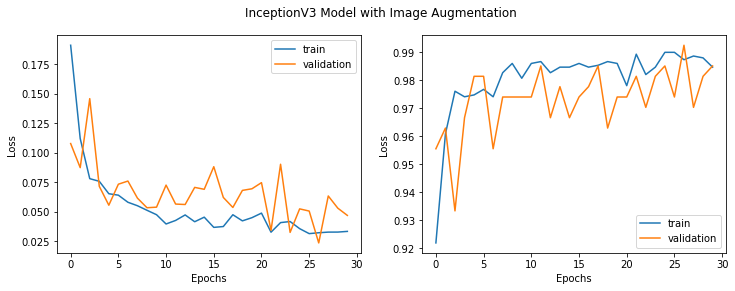

In [ ]:
plot_history(inception_history,'InceptionV3 Model with Image Augmentation')

In [ ]:
import pandas as pd
layers = [(layer, layer.name, layer.trainable) for layer in inception_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable']) 

Layer Type  ... Layer Trainable
0    <tensorflow.python.keras.engine.input_layer.In...  ...           False
1    <tensorflow.python.keras.layers.convolutional....  ...           False
2    <tensorflow.python.keras.layers.normalization_...  ...           False
3    <tensorflow.python.keras.layers.core.Activatio...  ...           False
4    <tensorflow.python.keras.layers.convolutional....  ...           False
..                                                 ...  ...             ...
308  <tensorflow.python.keras.layers.merge.Concaten...  ...           False
309  <tensorflow.python.keras.layers.core.Activatio...  ...           False
310  <tensorflow.python.keras.layers.merge.Concaten...  ...           False
311  <tensorflow.python.keras.layers.core.Flatten o...  ...            True
312  <tensorflow.python.keras.layers.core.Dense obj...  ...            True

[313 rows x 3 columns]

In [ ]:
##Model Evaluation
tst_loss,tst_acc=inception_model.evaluate(test_data)
print('Inception Model Test Loss: {}, Test Accuracy: {}'.format(tst_loss,tst_acc))

16/16 [==============================] - 12s 717ms/step - loss: 0.0294 - accuracy: 0.9855
Inception Model Test Loss: 0.029403990134596825, Test Accuracy: 0.9855371713638306


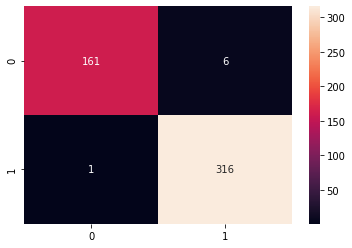

In [ ]:
##Model Evaulation
y_hat_inception=(inception_model.predict(test_imgs_scaled) > 0.5).astype("int32")
cm=confusion_matrix(test_labels_enc,y_hat_inception)
sns.heatmap(cm, annot=True, fmt="d")

In [ ]:
##Model Evaluation
from sklearn.metrics import classification_report
print(classification_report(test_labels_enc,y_hat_inception))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       167
           1       0.98      1.00      0.99       317

    accuracy                           0.99       484
   macro avg       0.99      0.98      0.98       484
weighted avg       0.99      0.99      0.99       484



# ResNet50 Model Implementation

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Flatten

94773248/94765736 [==============================] - 1s 0us/step


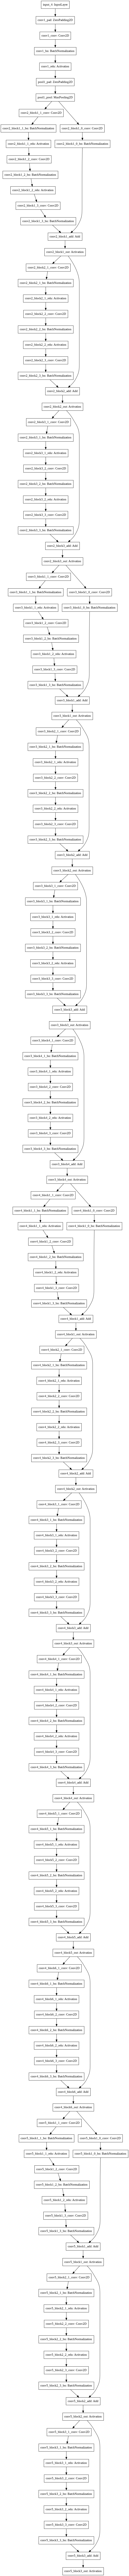

In [ ]:
resnet=ResNet50(include_top=False,weights='imagenet',
         input_shape=input_shape)
plot_model(resnet,to_file='model.png')

In [ ]:
##Avoid training existing weights, otherwise existing weights will be overwrite
for layer in resnet.layers:
  layer.trainable=False

In [ ]:
x=Flatten()(resnet.output)
prediction_resnet=Dense(1,activation='sigmoid')(x)

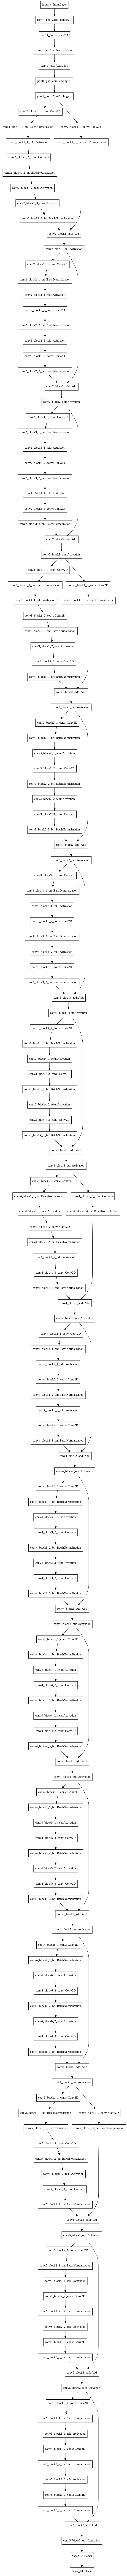

In [ ]:
##Create Inception Model
from tensorflow.keras.models import Model
resnet_model=Model(inputs=resnet.input,outputs=prediction_resnet)
plot_model(resnet_model)

In [ ]:
#resnet_model.trainable=False ##ResNet Freeze
resnet_model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 156, 156, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 75, 75, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 75, 75, 64)   256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [ ]:
resnet_model.compile(optimizer=RMSprop(learning_rate=0.0001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
resnet_history=resnet_model.fit(train_data,
                          validation_data=val_data,
                          batch_size=batch_size,
                          steps_per_epoch=train_data.samples//batch_size,
                          #validation_steps=val_data.samples//batch_size,
                          epochs=epochs,
                          verbose=1)
#resnet_model.save('model_resnet.h5')

Epoch 1/30
48/48 [==============================] - 53s 1s/step - loss: 0.5953 - accuracy: 0.6978 - val_loss: 0.7871 - val_accuracy: 0.3000
Epoch 2/30
48/48 [==============================] - 49s 1s/step - loss: 0.5638 - accuracy: 0.6879 - val_loss: 0.5445 - val_accuracy: 0.7000
Epoch 3/30
48/48 [==============================] - 49s 1s/step - loss: 0.5176 - accuracy: 0.7210 - val_loss: 0.5095 - val_accuracy: 0.7037
Epoch 4/30
48/48 [==============================] - 49s 1s/step - loss: 0.4891 - accuracy: 0.7548 - val_loss: 0.5174 - val_accuracy: 0.7000
Epoch 5/30
48/48 [==============================] - 48s 1s/step - loss: 0.4693 - accuracy: 0.7846 - val_loss: 0.4596 - val_accuracy: 0.7185
Epoch 6/30
48/48 [==============================] - 49s 1s/step - loss: 0.4414 - accuracy: 0.8250 - val_loss: 0.4498 - val_accuracy: 0.8074
Epoch 7/30
48/48 [==============================] - 49s 1s/step - loss: 0.4267 - accuracy: 0.8476 - val_loss: 0.4491 - val_accuracy: 0.8407
Epoch 8/30
48/48 [==

True

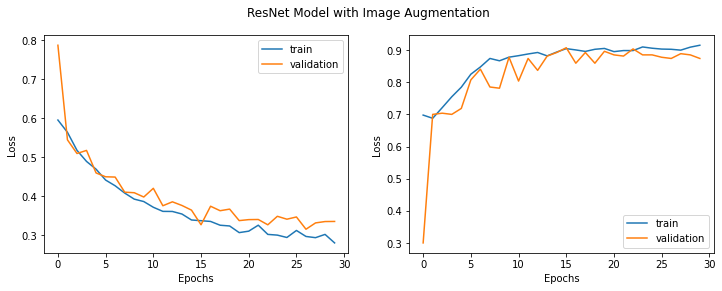

In [ ]:
plot_history(resnet_history,'ResNet Model with Image Augmentation')

In [ ]:
import pandas as pd
layers = [(layer, layer.name, layer.trainable) for layer in resnet_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable']) 

Layer Type  ... Layer Trainable
0    <tensorflow.python.keras.engine.input_layer.In...  ...           False
1    <tensorflow.python.keras.layers.convolutional....  ...           False
2    <tensorflow.python.keras.layers.convolutional....  ...           False
3    <tensorflow.python.keras.layers.normalization_...  ...           False
4    <tensorflow.python.keras.layers.core.Activatio...  ...           False
..                                                 ...  ...             ...
172  <tensorflow.python.keras.layers.normalization_...  ...           False
173  <tensorflow.python.keras.layers.merge.Add obje...  ...           False
174  <tensorflow.python.keras.layers.core.Activatio...  ...           False
175  <tensorflow.python.keras.layers.core.Flatten o...  ...            True
176  <tensorflow.python.keras.layers.core.Dense obj...  ...            True

[177 rows x 3 columns]

In [ ]:
##Model Evaluation
tst_loss,tst_acc=resnet_model.evaluate(test_data)
print('ResNet Model Test Loss: {}, Test Accuracy: {}'.format(tst_loss,tst_acc))

 1/16 [>.............................] - ETA: 13s - loss: 0.2327 - accuracy: 0.9062

In [ ]:
##Model Evaulation
y_hat_resnet=(resnet_model.predict(test_imgs_scaled) > 0.5).astype("int32")
cm=confusion_matrix(test_labels_enc,y_hat_resnet)
sns.heatmap(cm, annot=True, fmt="d")